In [108]:
# Identify the best test-drive prospects for BMW. Look for common characteristics.

In [36]:
import pandas as pd

In [37]:
df=pd.read_excel("Experian Step Up Survey Data.xlsx") # to read the excel file from system

In [38]:
df.sample(5) #show only 5 random samples

,first_name,last_name,gender,age,town,income_band,preferred_make,owns_car,has_drivers_license,decision_maker,intent_on_buying,has_ongoing_lease,target_price_range,has_used_electric_vehicle,requests_test_drive,has_driveway
6782,Mary,Robinson,prefer not to say,18-24,Crewe,"£15k-£19,999",Toyota,Yes,No,Yes,No,Yes,£90000-£100K,Yes,Yes,No
3934,Hannah,Thomas,female,25-34,Birmingham,"£60k-£69,999",Hyundai,No,No,No,Yes,No,£50000-£60000,No,Yes,Yes
5492,Pamela,Evans,prefer not to say,25-34,Morpeth,"£70k-£99,999",Hyundai,No,Yes,No,Yes,Yes,£70000-£80000,No,Yes,No
3457,Oliver,Martin,prefer not to say,45-54,Dorchester,<£10k,Kia,Yes,Yes,Yes,Yes,No,£120K-£150K,No,Yes,No
4146,Jack,Jenkins,prefer not to say,35-44,Poole,"£15k-£19,999",Audi,No,No,No,No,No,£30000-£40000,No,No,No


# Cleaning

In [39]:
df.isna().sum() # check if there is null values presents in the datasets. isna() will show boolean values therefore
                # i have used sum() function as well so that it could sum up all boolean true values column wise.

first_name                   0
last_name                    0
gender                       0
age                          0
town                         0
income_band                  0
preferred_make               0
owns_car                     0
has_drivers_license          0
decision_maker               0
intent_on_buying             0
has_ongoing_lease            0
target_price_range           0
has_used_electric_vehicle    0
requests_test_drive          0
has_driveway                 0
dtype: int64

In [40]:
# clearly, there is no null data exists.

In [41]:
df.dtypes # dtypes is used to check the data types of the columns.
          # Here all the columns are object datatypes. Object datatype means string type. but we have numerical
          # values as well in the datasets. Therefore we need to do type casting for those columns have numerical.

first_name                   object
last_name                    object
gender                       object
age                          object
town                         object
income_band                  object
preferred_make               object
owns_car                     object
has_drivers_license          object
decision_maker               object
intent_on_buying             object
has_ongoing_lease            object
target_price_range           object
has_used_electric_vehicle    object
requests_test_drive          object
has_driveway                 object
dtype: object

In [42]:
# Age, income_band and target_price_range should be numric type.

In [43]:
# Lets make age just 65 instead of "65 and over".

In [44]:
df["age"]=df["age"].str.replace("and over", "")

In [45]:
# Age have range with hyphen separated as well. Every person have the range of age. Lets take mean
# or average of the age range in order to work.

In [46]:
df["age"]=df["age"].str.split("-", expand=True).astype(float).mean(axis=1)

In [53]:
df.sample(5)

,first_name,last_name,gender,age,town,income_band,preferred_make,owns_car,has_drivers_license,decision_maker,intent_on_buying,has_ongoing_lease,target_price_range,has_used_electric_vehicle,requests_test_drive,has_driveway
416,Andy,White,male,29.5,Loughborough,"£10k-£14,999",Nissan,No,No,Yes,No,Yes,£50000-£60000,No,Yes,No
88,Joe,O'Sullivan,prefer not to say,21.0,Nottingham,"£70k-£99,999",Kia,Yes,Yes,Yes,No,Yes,£120K-£150K,No,No,No
2327,Rick,Brown,prefer not to say,65.0,Nottingham,£100k+,Skoda,Yes,No,Yes,Yes,Yes,£50000-£60000,No,No,No
4903,William,Anderson,male,39.5,Manchester,"£10k-£14,999",Suzuki,No,No,No,Yes,No,£90000-£100K,No,Yes,Yes
4730,Ava,Chapman,female,65.0,Bedford,"£20k-£29,999",Saab,No,No,No,No,No,£150K+,No,No,No


In [54]:
# Lets do similar with the column name income_band. this column have "k" as well such as £10k=10x1000=10000.
# I need to replace "k" with triple zero to make it number.

In [55]:
df["income_band"]=df["income_band"].str.replace("k", "000")

In [58]:
df.sample(5) # Now we can see there is no "k" instaed we have number.

,first_name,last_name,gender,age,town,income_band,preferred_make,owns_car,has_drivers_license,decision_maker,intent_on_buying,has_ongoing_lease,target_price_range,has_used_electric_vehicle,requests_test_drive,has_driveway
1362,Bethany,Knight,female,59.5,Derby,£100000+,Mini,Yes,Yes,No,Yes,No,£30000-£40000,No,No,No
4873,Kenneth,Swift,male,65.0,Poole,"£10000-£14,999",Honda,No,No,Yes,Yes,No,£30000-£40000,No,No,No
4334,Heather,Allen,female,29.5,Crewe,"£30000-£39,999",Land Rover,Yes,Yes,No,No,No,£80000-£90000,Yes,No,Yes
551,Elizabeth,Singh,female,65.0,Dorchester,"£50000-£59,999",Kia,Yes,Yes,Yes,No,Yes,£30000-£40000,No,Yes,Yes
4437,Rachel,O'Sullivan,female,59.5,Congleton,"£20000-£29,999",Land Rover,Yes,No,Yes,No,No,£100K-£120K,Yes,No,No


In [59]:
# Now lets replace "+" and "£" to nothing.

In [73]:
df["income_band"]=df["income_band"].str.replace("£", "")
df["income_band"]=df["income_band"].str.replace("+", "")
df["income_band"]=df["income_band"].str.replace(",", "")
df["income_band"]=df["income_band"].str.replace("<", "")

/tmp/ipykernel_5736/2787417918.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["income_band"]=df["income_band"].str.replace("+", "")


In [78]:
df.sample(5)

,first_name,last_name,gender,age,town,income_band,preferred_make,owns_car,has_drivers_license,decision_maker,intent_on_buying,has_ongoing_lease,target_price_range,has_used_electric_vehicle,requests_test_drive,has_driveway
6764,Lauren,Walker,prefer not to say,65.0,Exeter,15000-19999,Suzuki,Yes,Yes,Yes,No,Yes,£90000-£100K,Yes,No,No
4001,Michael,Evans,male,65.0,Bodmin,100000,Alfa Romer,Yes,Yes,Yes,No,Yes,£120K-£150K,No,No,Yes
5492,Pamela,Evans,prefer not to say,29.5,Morpeth,70000-99999,Hyundai,No,Yes,No,Yes,Yes,£70000-£80000,No,Yes,No
2975,Nicholas,Taylor,male,39.5,Bodmin,70000-99999,Opel,No,No,Yes,Yes,No,£100K-£120K,No,Yes,Yes
6989,Roy,Brown,prefer not to say,39.5,Thetford,15000-19999,Tesla,No,Yes,Yes,Yes,No,£150K+,Yes,Yes,No


In [79]:
# Now split the range of income and take mean.

In [80]:
df["income_band"]=df["income_band"].str.split("-", expand=True).astype(float).mean(axis=1)

In [83]:
df.sample(7)

,first_name,last_name,gender,age,town,income_band,preferred_make,owns_car,has_drivers_license,decision_maker,intent_on_buying,has_ongoing_lease,target_price_range,has_used_electric_vehicle,requests_test_drive,has_driveway
5897,Charles,Allen,male,65.0,Morpeth,17499.5,Jaguar,Yes,Yes,No,No,Yes,£20000-£30000,Yes,Yes,Yes
3575,Brian,Johnson,prefer not to say,39.5,Bodmin,34999.5,Audi,Yes,Yes,No,Yes,No,£80000-£90000,Yes,No,No
1864,Andy,Garcia,male,49.5,Blackpool,54999.5,Alfa Romer,Yes,Yes,Yes,Yes,No,£150K+,Yes,Yes,No
6686,Kyle,Dawson,male,65.0,Lutton,64999.5,Opel,Yes,Yes,Yes,Yes,Yes,£20000-£30000,Yes,No,No
7023,Madison,Evans,female,29.5,Priston,84999.5,Skoda,No,No,Yes,No,Yes,£80000-£90000,No,No,No
878,Michael,Rodrigues,prefer not to say,65.0,Leicester,10000.0,Skoda,Yes,Yes,Yes,Yes,Yes,£20000-£30000,No,No,No
4845,Mason,Anderson,male,21.0,Amersham,10000.0,Peugeot,No,Yes,Yes,No,Yes,£80000-£90000,No,No,No


### Lets do the same with target_price_range

In [86]:
df["target_price_range"]=df["target_price_range"].str.replace("[K£+]", "", regex=True)

In [88]:
df.sample(5)

,first_name,last_name,gender,age,town,income_band,preferred_make,owns_car,has_drivers_license,decision_maker,intent_on_buying,has_ongoing_lease,target_price_range,has_used_electric_vehicle,requests_test_drive,has_driveway
3814,Emily,Anderson,female,65.0,Dorchester,54999.5,Mini,Yes,Yes,Yes,Yes,Yes,50000-60000,No,Yes,No
4208,Cynthia,O'Sullivan,female,29.5,Amersham,10000.0,Honda,No,Yes,Yes,Yes,Yes,30000-40000,No,No,No
1660,Mary,Wang,female,39.5,Durham,64999.5,Mitsubishi,No,No,Yes,No,Yes,120-150,No,Yes,No
6258,Rebecca,Green,prefer not to say,59.5,Warrington,64999.5,Hyundai,Yes,Yes,Yes,Yes,Yes,120-150,Yes,No,Yes
6367,Diane,Lee,female,59.5,Longport,17499.5,BMW,No,Yes,Yes,No,Yes,80000-90000,No,No,Yes


In [89]:
# calculate average range of target price by taking mean of both the numbers which are hyphen seperated.

In [90]:
df["target_price_range"]=df["target_price_range"].str.split("-", expand=True).astype(float).mean(axis=1)

In [105]:
df.sample(5)

,first_name,last_name,name,gender,age,town,income_band,preferred_make,owns_car,has_drivers_license,decision_maker,intent_on_buying,has_ongoing_lease,target_price_range,has_used_electric_vehicle,requests_test_drive,has_driveway
2497,Stewart,Carter,Stewart Carter,male,49.5,Manchester,10000.0,Volvo,No,Yes,No,Yes,No,85000.0,Yes,Yes,Yes
7000,Martin,Taylor,Martin Taylor,male,65.0,Priston,100000.0,Alfa Romer,Yes,Yes,No,No,Yes,150.0,Yes,Yes,Yes
6604,Charlie,Roberts,Charlie Roberts,male,39.5,Peterborough,100000.0,Audi,Yes,No,Yes,No,No,110.0,No,No,No
2990,Charlotte,Wilson,Charlotte Wilson,female,49.5,Aberdeen,24999.5,BMW,Yes,Yes,Yes,No,Yes,55000.0,Yes,No,Yes
4701,Madison,Payne,Madison Payne,female,49.5,Loughborough,34999.5,Skoda,No,No,Yes,Yes,No,110.0,Yes,No,Yes


In [98]:
df["name"]=df["first_name"]+ " " +df["last_name"]

In [100]:
position_column=df.pop("name")

In [102]:
df.insert(2, "name", position_column)

In [106]:
df.sample(5) # Now our dataset is ready to analyse.

,first_name,last_name,name,gender,age,town,income_band,preferred_make,owns_car,has_drivers_license,decision_maker,intent_on_buying,has_ongoing_lease,target_price_range,has_used_electric_vehicle,requests_test_drive,has_driveway
3310,John,Smith,John Smith,male,65.0,Durham,44999.5,Saab,No,No,Yes,Yes,Yes,45050.0,Yes,Yes,No
3354,Kevin,Tremblay,Kevin Tremblay,prefer not to say,59.5,Bodmin,24999.5,Mercedes-Benz,Yes,No,Yes,Yes,No,45050.0,Yes,No,No
1716,Poppy,Jenkins,Poppy Jenkins,female,65.0,Exeter,12499.5,Kia,Yes,Yes,Yes,No,No,15000.0,Yes,No,No
6239,Christopher,Walker,Christopher Walker,male,29.5,Ely,17499.5,Peugeot,Yes,Yes,Yes,Yes,No,85000.0,Yes,No,No
4604,Nicholas,Taylor,Nicholas Taylor,male,49.5,Morpeth,17499.5,Hyundai,No,Yes,Yes,Yes,Yes,15000.0,No,No,Yes


# Analysis

In [107]:
df

,first_name,last_name,name,gender,age,town,income_band,preferred_make,owns_car,has_drivers_license,decision_maker,intent_on_buying,has_ongoing_lease,target_price_range,has_used_electric_vehicle,requests_test_drive,has_driveway
0,Jennifer,Burton,Jennifer Burton,female,21.0,Bristol,17499.5,Subaru,No,Yes,Yes,No,Yes,45050.0,Yes,No,Yes
1,Matthew,Corbyn,Matthew Corbyn,male,59.5,London,54999.5,Skoda,Yes,Yes,Yes,Yes,Yes,135.0,No,No,Yes
2,Paul,Harris,Paul Harris,prefer not to say,29.5,London,17499.5,Jeep,Yes,Yes,No,No,No,45050.0,No,Yes,No
3,Andrew,Taylor,Andrew Taylor,prefer not to say,49.5,Liverpool,100000.0,Subaru,Yes,No,Yes,Yes,No,135.0,Yes,No,Yes
4,Joshua,O'Connor,Joshua O'Connor,male,39.5,Priston,24999.5,Honda,Yes,Yes,No,No,No,15000.0,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,Edward,Lewis,Edward Lewis,male,59.5,Morpeth,12499.5,Other,Yes,Yes,Yes,Yes,Yes,85000.0,No,No,No
7246,Alexander,Griffiths,Alexander Griffiths,prefer not to say,29.5,Loughborough,44999.5,Fiat,No,Yes,Yes,No,Yes,15000.0,No,Yes,Yes
7247,Sandra,Harris,Sandra Harris,prefer not to say,49.5,Longport,34999.5,Land Rover,Yes,No,No,Yes,Yes,110.0,No,No,Yes
7248,Reece,Allen,Reece Allen,male,59.5,Morpeth,17499.5,Tesla,No,Yes,Yes,No,No,110.0,No,Yes,No


In [109]:
import matplotlib.pyplot as plt

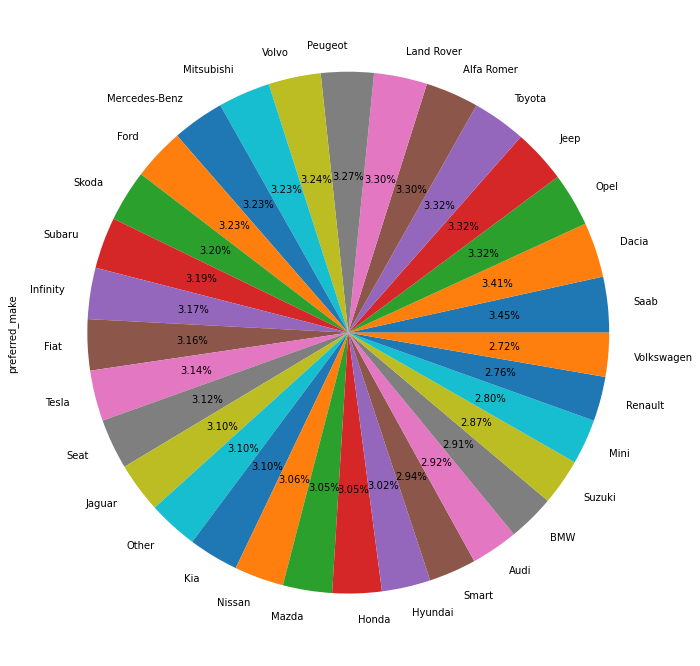

In [123]:
df["preferred_make"].value_counts().plot(kind="pie", figsize=(12, 12), autopct='%1.2f%%');
# these %age of people prefers car company such as 2.91% of the people from 7250 number of people prefer BMW car.

## SQLite

In [124]:
# Price of BMW new launching Electric car is £70000. Therefore lets check target_price_range.

In [128]:
import sqlite3 as database

In [129]:
conn=database.connect("cardatabase.bd")

In [133]:
df.to_sql("df", conn)

In [139]:
pd.read_sql("select * from df where target_price_range >= 70000", conn)
# There are only 1401 people who can offord the electric car(because minimum price of BMW electric car is £70000).

,index,first_name,last_name,name,gender,age,town,income_band,preferred_make,owns_car,has_drivers_license,decision_maker,intent_on_buying,has_ongoing_lease,target_price_range,has_used_electric_vehicle,requests_test_drive,has_driveway
0,6,Andrew,Walsh,Andrew Walsh,prefer not to say,39.5,Longport,17499.5,Land Rover,No,Yes,Yes,Yes,Yes,75000.0,No,No,Yes
1,7,Taylor,Knowles,Taylor Knowles,female,49.5,Exeter,34999.5,Land Rover,Yes,Yes,No,No,Yes,85000.0,No,Yes,Yes
2,17,Evelin,Payne,Evelin Payne,female,39.5,Banbury,44999.5,Saab,Yes,No,Yes,No,No,85000.0,No,Yes,No
3,21,George,Jenkins,George Jenkins,prefer not to say,49.5,Leicester,84999.5,Volkswagen,Yes,No,No,Yes,Yes,75000.0,Yes,No,No
4,22,Margaret,Carter,Margaret Carter,female,49.5,Banbury,64999.5,Ford,Yes,Yes,Yes,No,Yes,85000.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,7229,Kyle,O'Brien,Kyle O'Brien,male,49.5,Thetford,54999.5,Ford,No,Yes,Yes,Yes,Yes,85000.0,No,No,No
1397,7231,Seth,Rodrigues,Seth Rodrigues,male,49.5,Burnley,10000.0,Seat,No,No,No,No,Yes,85000.0,Yes,Yes,Yes
1398,7235,Susan,Knight,Susan Knight,female,49.5,Hereford,44999.5,Ford,Yes,Yes,No,Yes,Yes,75000.0,Yes,Yes,Yes
1399,7245,Edward,Lewis,Edward Lewis,male,59.5,Morpeth,12499.5,Other,Yes,Yes,Yes,Yes,Yes,85000.0,No,No,No


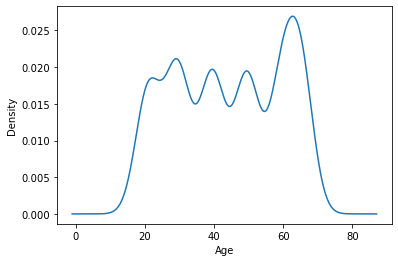

In [174]:
age_dist=pd.read_sql("select * from df where target_price_range >= 70000", conn)
age_dist["age"].plot.kde();
plt.xlabel("Age");
# density graph shows a bandwidth. here density of people are more from age 20 to 75. However, from age 60 to 70
# (elderly people) are more densile and eligible to buy EV Car.

In [178]:
pd.read_sql("select count(*) as Total_number from df where target_price_range >= 70000 and age > 18", conn)
# All of them are legal to drive a car in terms of age.

,Total_number
0,1401


In [177]:
pd.read_sql("select count(*) as Total_number from df where target_price_range >= 70000 and age > 18 and intent_on_buying = 'Yes' ", conn)
# Out of 1401 people there are only 896 people who really have intension to buy a car.

,Total_number
0,896


In [176]:
pd.read_sql("select count(*) as Total_number from df where target_price_range >= 70000 and age > 18 and intent_on_buying = 'Yes' and has_drivers_license = 'Yes' ", conn)
# Out of 896 only 526 people have their driving license so they can test drive and buy.

,Total_number
0,526


In [154]:
possible_df=pd.read_sql("select * from df where target_price_range >= 70000 and age > 18 and intent_on_buying = 'Yes' and has_drivers_license = 'Yes' ", conn)

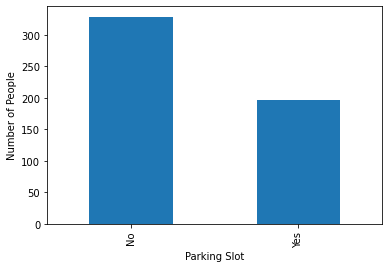

In [166]:
possible_df["has_driveway"].value_counts().plot(kind="bar");
plt.xlabel("Parking Slot");
plt.ylabel("Number of People");

In [165]:
# There are around 200 people who have parking slot in front of their house rest of them don't have.
# 200 people have more chance that they can buy the EV car.
# Rest of the people have not that much chance of buying Electic car because no one would like to keep this
# expensive car any other place.

# Machine Learning Model